In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-crime/sampleSubmission.csv.zip
/kaggle/input/sf-crime/train.csv.zip
/kaggle/input/sf-crime/test.csv.zip


## 데이터 훑어보기
1. csv 파일을 데이터프레임으로 읽기

In [6]:
# 압축 풀기
!unzip '../input/sf-crime/test.csv.zip'
!unzip '../input/sf-crime/train.csv.zip'
!ls -al

Archive:  ../input/sf-crime/test.csv.zip
  inflating: test.csv                
Archive:  ../input/sf-crime/train.csv.zip
  inflating: train.csv               
total 213324
drwxr-xr-x 2 root root      4096 Jul 20 04:44 .
drwxr-xr-x 5 root root      4096 Jul 20 04:38 ..
---------- 1 root root       263 Jul 20 04:38 __notebook_source__.ipynb
-rw-r--r-- 1 root root  90996610 May 12  2018 test.csv
-rw-r--r-- 1 root root 127433651 Jun  3  2015 train.csv


In [19]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

2. 학습 데이터 셋의 상위 5개 항목 출력

In [20]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


학습 데이터 셋의 각 필드 데이터 분포(평균, 최소값, 최대값 등)를 살펴보기

In [21]:
train.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


각 컬럼의 데이터 타입 확인하기

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


범죄의 범주 'Category'는 어떤 값이 있는지 확인하기

In [26]:
train['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

## 데이터 할당/변경하기(create, update)
Dates 필드의 데이터타입을 'datetime64' 타입으로 변경하기

범죄 사건 발생 날짜 및 시간 정보를 포함한 'Dates'필드의 값을 연도별, 월별, 일별, 시간별로 분석하기 위해서 datetime64타입으로 변환합니다.

문자열 파싱을 해서 분석할 수도 있지만, datetime64 타입으로 변환하면 파이썬 내장함수를 사용해서 쉽게 연/월/일/시간별 값을 얻어올 수 있습니다.

In [27]:
train['Dates'] = pd.to_datetime(train['Dates'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


In [ ]:
# 이렇게 해도 됨!
# train['Dates'] = train['Dates'].astype(datetime64)

연, 월, 일, 요일, 시, 분값을 새로운 컬럼(year, month, day, dayofweek, hour, minute)을 생성해서 할당하기

In [31]:
# 람다 이용 방법
get_year = lambda x: x.year
train['year'] = train['Dates'].apply(get_year)
train['year']d

0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
878044    2003
878045    2003
878046    2003
878047    2003
878048    2003
Name: year, Length: 878049, dtype: int64

In [43]:
# 더 쉬운 방법
train['month'] = train['Dates'].dt.month
train['day'] = train['Dates'].dt.day
train['dayofweek'] = train['Dates'].dt.dayofweek
train['hour'] = train['Dates'].dt.hour
train['minute'] = train['Dates'].dt.minute


train[['Dates', 'year', 'month', 'day', 'dayofweek', 'hour', 'minute']]

,Dates,year,month,day,dayofweek,hour,minute
0,2015-05-13 23:53:00,2015,5,13,2,23,53
1,2015-05-13 23:53:00,2015,5,13,2,23,53
2,2015-05-13 23:33:00,2015,5,13,2,23,33
3,2015-05-13 23:30:00,2015,5,13,2,23,30
4,2015-05-13 23:30:00,2015,5,13,2,23,30
...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,2003,1,6,0,0,15
878045,2003-01-06 00:01:00,2003,1,6,0,0,1
878046,2003-01-06 00:01:00,2003,1,6,0,0,1
878047,2003-01-06 00:01:00,2003,1,6,0,0,1


+) 속성 궁금하면 참고하기

https://m.blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221603462366&proxyReferer=https:%2F%2Fwww.google.com%2F

범죄가 발생한 경도, 위도 값을 나타내는 X, Y 컬럼의 값을 더한 값을 담은 'X+Y' 컬럼, X, Y의 차이 값을 담은 'X-Y' 컬럼을 생성하기

In [42]:
train['X+Y'] = train['X'] + train['Y']
train['X-Y'] = train['X'] - train['Y']
train[['X', 'Y', 'X+Y', 'X-Y']]

,X,Y,X+Y,X-Y
0,-122.425892,37.774599,-84.651293,-160.200490
1,-122.425892,37.774599,-84.651293,-160.200490
2,-122.424363,37.800414,-84.623949,-160.224777
3,-122.426995,37.800873,-84.626123,-160.227868
4,-122.438738,37.771541,-84.667196,-160.210279
...,...,...,...,...
878044,-122.459033,37.714056,-84.744977,-160.173089
878045,-122.447364,37.731948,-84.715416,-160.179311
878046,-122.403390,37.780266,-84.623125,-160.183656
878047,-122.390531,37.780607,-84.609924,-160.171138


n_days라는 컬럼을 생성하고, 일별 d-day를 계산하여 입력하기 예: 범죄 첫발생일: 0, 다음 발생일: 1

In [69]:
date_diff = train['Dates'] - train['Dates'].min()
date_diff

0        4510 days 23:52:00
1        4510 days 23:52:00
2        4510 days 23:32:00
3        4510 days 23:29:00
4        4510 days 23:29:00
                ...        
878044      0 days 00:14:00
878045      0 days 00:00:00
878046      0 days 00:00:00
878047      0 days 00:00:00
878048      0 days 00:00:00
Name: Dates, Length: 878049, dtype: timedelta64[ns]

In [68]:
train['n_days'] = date_diff.apply(lambda x: x.days)
train['n_days']

0         4510
1         4510
2         4510
3         4510
4         4510
          ... 
878044       0
878045       0
878046       0
878047       0
878048       0
Name: n_days, Length: 878049, dtype: int64

변수 y를 선언해서 학습할 목표변수(=종속변수)인 Category 필드값을 담기

In [44]:
y = train['Category']

## 데이터 선택하기(select)

연도별(year) 범죄 발생 횟수를 알아보기

[힌트]
* value_counts를 사용하는 방법
* groupby를 사용하는 방법

In [53]:
# value_counts를 사용하는 방법
train['year'].value_counts().sort_index()

2003    73902
2004    73422
2005    70779
2006    69909
2007    68015
2008    70174
2009    69000
2010    66542
2011    66619
2012    71731
2013    75606
2014    74766
2015    27584
Name: year, dtype: int64

In [52]:
# groupby를 사용하는 방법
train.groupby('year').size()

year
2003    73902
2004    73422
2005    70779
2006    69909
2007    68015
2008    70174
2009    69000
2010    66542
2011    66619
2012    71731
2013    75606
2014    74766
2015    27584
dtype: int64

월별(month) 범죄 발생 횟수를 알아보기

In [71]:
train.groupby('month').size()

month
1     73536
2     70813
3     76320
4     78096
5     79644
6     70892
7     69971
8     68540
9     71982
10    80274
11    72975
12    65006
dtype: int64

요일별(DayOfWeek) 범죄 발생 횟수를 알아보기

In [78]:
train.groupby('DayOfWeek').size()

DayOfWeek
Friday       133734
Monday       121584
Saturday     126810
Sunday       116707
Thursday     125038
Tuesday      124965
Wednesday    129211
dtype: int64

카테고리별(Category) 범죄 발생 횟수를 알아보기

In [79]:
train.groupby('Category').size()

Category
ARSON                            1513
ASSAULT                         76876
BAD CHECKS                        406
BRIBERY                           289
BURGLARY                        36755
DISORDERLY CONDUCT               4320
DRIVING UNDER THE INFLUENCE      2268
DRUG/NARCOTIC                   53971
DRUNKENNESS                      4280
EMBEZZLEMENT                     1166
EXTORTION                         256
FAMILY OFFENSES                   491
FORGERY/COUNTERFEITING          10609
FRAUD                           16679
GAMBLING                          146
KIDNAPPING                       2341
LARCENY/THEFT                  174900
LIQUOR LAWS                      1903
LOITERING                        1225
MISSING PERSON                  25989
NON-CRIMINAL                    92304
OTHER OFFENSES                 126182
PORNOGRAPHY/OBSCENE MAT            22
PROSTITUTION                     7484
RECOVERED VEHICLE                3138
ROBBERY                         23000
RUN

null값이 포함된 데이터 필드가 있는지 확인하기

In [83]:
train.isnull().describe()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
count,878049,878049,878049,878049,878049,878049,878049,878049,878049,878049,878049,878049,878049,878049,878049,878049,878049,878049
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,878049,878049,878049,878049,878049,878049,878049,878049,878049,878049,878049,878049,878049,878049,878049,878049,878049,878049


## 데이터 시각화
라이브러리 import``` import seaborn as sns import matplotlib.pylab as plt ```

In [84]:
import seaborn as sns
import matplotlib.pylab as plt

월별 범죄율 시각화하기

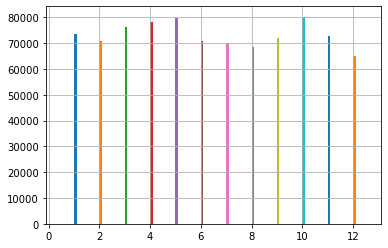

In [97]:
# 월별 범죄 횟수
grouped = train.groupby('month')['month']
g = grouped.hist()

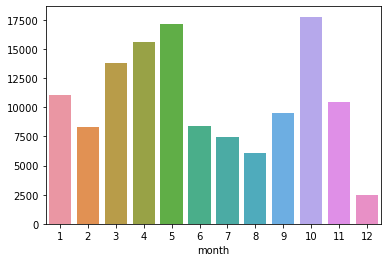

In [113]:
# 다른 방법 (index 사용, 변화를 뚜렷하게 보기 위해서 일정 값 차감)
sns.barplot(x=train.groupby('month').size().index, y=train.groupby('month').size().values -62500)

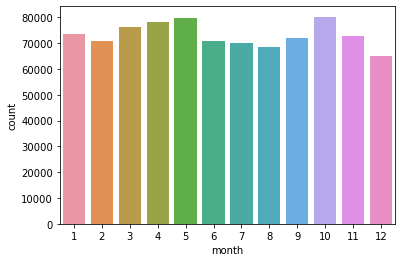

In [101]:
# 더 쉽고 예쁘다!
sns.countplot(x='month', data=train)
plt.show()

연도별, 월별, 일별, 요일별, 카테고리별 범죄 횟수 시각화 

In [102]:
train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23,33,-84.623949,-160.224777,4510
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23,30,-84.626123,-160.227868,4510
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23,30,-84.667196,-160.210279,4510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003,1,6,0,0,15,-84.744977,-160.173089,0
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,6,0,0,1,-84.715416,-160.179311,0
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,0,0,1,-84.623125,-160.183656,0
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,6,0,0,1,-84.609924,-160.171138,0


In [121]:
# TODO 그래프 나눠넣어보기
palette='rocket'
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(2,3, figsize=(10, 10))
sns.countplot(x='year', data=train, palette=palette, ax=ax1)
sns.countplot(x='month', data=train, palette=palette, ax=ax2)
sns.countplot(x='day', data=train, palette=palette, ax=ax3)
sns.countplot(x='dayofweek', data=train, palette=palette, ax=ax4)
sns.countplot(x='Category', data=train, palette=palette, ax=ax5)
plt.show()

TypeError: Must pass values for either `x` or `y`

## 데이터 삭제하기(delete)

'Dates','Category','Descript','DayOfWeek','Resolution' 컬럼 삭제하기

In [ ]:
train = train.drop(['Dates','Category','Descript','DayOfWeek','Resolution'], axis=1)